## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Cleaned Datasets

In [2]:
agri = pd.read_csv(r"D:\Internship_Project\datasets\agriculture_gujarat_clean.csv")
rain = pd.read_csv(r"D:\Internship_Project\datasets\rainfall_IMD_clean.csv")

print("Data loaded successfully!\n")
print("Agriculture Data:")
display(agri.head())
print("\nRainfall Data:")
display(rain.head())

Data loaded successfully!

Agriculture Data:


,Sr._No.,Crops,Area,Production,Yield,State,Year
0,1.0,Groundnut,1694.42,4642.46,2739.85,Gujarat,2024
1,2.0,Castor seed,724.77,1551.72,2140.99,Gujarat,2024
2,3.0,Sesamum,163.31,130.71,800.42,Gujarat,2024
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41,Gujarat,2024
4,5.0,Soyabean,265.74,488.30,1837.52,Gujarat,2024



Rainfall Data:


,Year,Actual,Forecast,Remark,State
0,2020,111,102,Outside the forecast error limit,All-India
1,2021,100,101,Accurate,All-India
2,2022,106,103,Accurate,All-India
3,2023,95,96,Accurate,All-India
4,2024,108,106,Accurate,All-India


## Step 3: Merge for Contextual Analysis

In [3]:
merged_df = pd.merge(agri, rain, how='left', on='Year')

print("Merged dataset created successfully!")
display(merged_df)

Merged dataset created successfully!


,Sr._No.,Crops,Area,Production,Yield,State_x,Year,Actual,Forecast,Remark,State_y
0,1.0,Groundnut,1694.42,4642.46,2739.85,Gujarat,2024,108,106,Accurate,All-India
1,2.0,Castor seed,724.77,1551.72,2140.99,Gujarat,2024,108,106,Accurate,All-India
2,3.0,Sesamum,163.31,130.71,800.42,Gujarat,2024,108,106,Accurate,All-India
3,4.0,Rapeseed & Mustard,277.35,554.53,1999.41,Gujarat,2024,108,106,Accurate,All-India
4,5.0,Soyabean,265.74,488.30,1837.52,Gujarat,2024,108,106,Accurate,All-India
5,6.0,Other Oilseeds,1.36,0.90,664.47,Gujarat,2024,108,106,Accurate,All-India


## Step 4: Compute Derived Insights

In [4]:
merged_df['Rainfall_Difference'] = merged_df['Actual'] - merged_df['Forecast']
merged_df['Yield_Efficiency'] = (merged_df['Yield'] / merged_df['Area']).round(2)

print("Derived metrics added!")
display(merged_df[['Crops', 'Area', 'Production', 'Yield', 'Actual', 'Forecast', 'Rainfall_Difference', 'Yield_Efficiency']])

Derived metrics added!


,Crops,Area,Production,Yield,Actual,Forecast,Rainfall_Difference,Yield_Efficiency
0,Groundnut,1694.42,4642.46,2739.85,108,106,2,1.62
1,Castor seed,724.77,1551.72,2140.99,108,106,2,2.95
2,Sesamum,163.31,130.71,800.42,108,106,2,4.90
3,Rapeseed & Mustard,277.35,554.53,1999.41,108,106,2,7.21
4,Soyabean,265.74,488.30,1837.52,108,106,2,6.91
5,Other Oilseeds,1.36,0.90,664.47,108,106,2,488.58


## Step 5: Build a Simple Question–Answer Function

In [5]:
def answer_query(query):
    query = query.lower()

    if "top" in query and "yield" in query:
        n = 3
        top_crops = merged_df.sort_values(by='Yield', ascending=False).head(n)
        return f"Top {n} crops by yield:\n" + str(top_crops[['Crops', 'Yield']].to_string(index=False))
    
    elif "rainfall" in query:
        avg_rain = merged_df['Actual'].mean()
        return f"Average IMD recorded rainfall (2020–2024): {avg_rain:.2f} mm"
    
    elif "production" in query and "total" in query:
        total_prod = merged_df['Production'].sum()
        return f"Total crop production in Gujarat (all crops): {total_prod:.2f} tonnes"
    
    elif "efficiency" in query:
        eff = merged_df[['Crops', 'Yield_Efficiency']].sort_values(by='Yield_Efficiency', ascending=False)
        return "Crop yield efficiency (Yield per Area):\n" + str(eff.to_string(index=False))
    
    else:
        return "Sorry, I couldn't understand that query. Try: 'top crops by yield', 'total production', 'average rainfall', or 'efficiency'."

# Test it
print(answer_query("top crops by yield"))

Top 3 crops by yield:
             Crops   Yield
         Groundnut 2739.85
       Castor seed 2140.99
Rapeseed & Mustard 1999.41


## Step 6: Add Visualization Helper Function

C:\Users\hp\AppData\Local\Temp\ipykernel_8212\3294808891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crops', y='Yield', data=merged_df, palette='coolwarm')


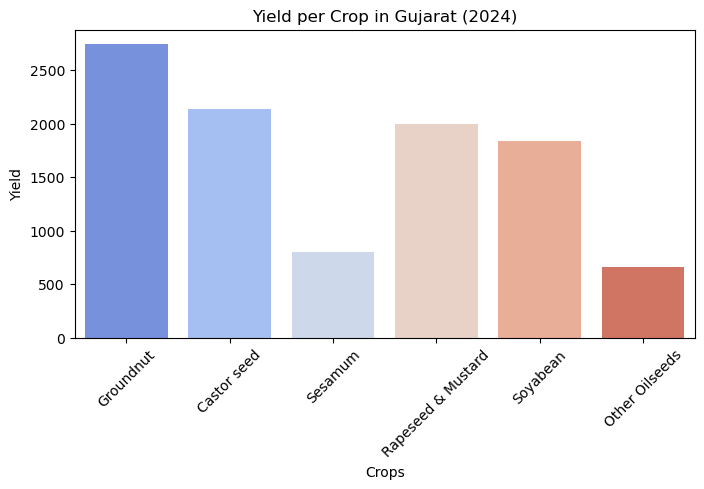

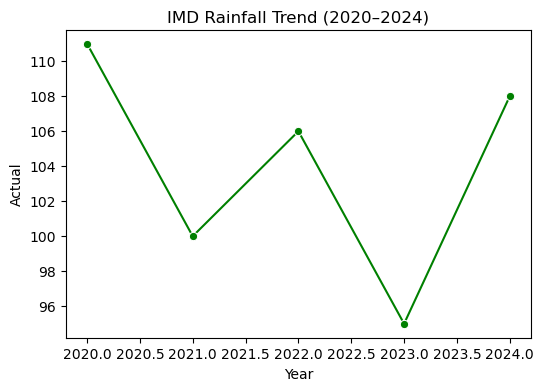

In [8]:
def visualize_data():
    plt.figure(figsize=(8,4))
    sns.barplot(x='Crops', y='Yield', data=merged_df, palette='coolwarm')
    plt.title("Yield per Crop in Gujarat (2024)")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(6,4))
    sns.lineplot(x='Year', y='Actual', data=rain, marker='o', color='green')
    plt.title("IMD Rainfall Trend (2020–2024)")
    plt.show()

visualize_data()

## Step 7: Try a Mini Conversation

In [10]:
print("Welcome to Bharat Agri-Insight Chatbot")
print("Type your question (or 'exit' to stop):")

while True:
    q = input(">> ")
    if q.lower() in ['exit', 'quit']:
        print("Exiting chat. Thank you!")
        break
    else:
        print(answer_query(q))
        print("-" * 60)

Welcome to Bharat Agri-Insight Chatbot
Type your question (or 'exit' to stop):


>>  total production


Total crop production in Gujarat (all crops): 7368.62 tonnes
------------------------------------------------------------


>>  exit


Exiting chat. Thank you!


## Step 8: Save Final Merged File

In [11]:
merged_df.to_csv(r"D:\Internship_Project\datasets\merged_agri_rainfall.csv", index=False)
print("Final merged dataset saved!")

Final merged dataset saved!
